# Teacher Salary Analysis

In [38]:
import numpy as np
import pandas as pd
from scipy import stats
from src.wrangle import read_and_filter_data

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 200)

## Acquire + Prepare

In [39]:
df = read_and_filter_data()

c:\Users\chris\OneDrive\Desktop\Anias\Teacher_Payroll_Analysis\src\wrangle.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Paystep', 'Differential', 'Differential Category', 'Salary Schedule']].fillna('Other', inplace=True)


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526568 entries, 0 to 526567
Data columns (total 22 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Fiscal Year                       526568 non-null  int64         
 1   Employee ID                       526568 non-null  object        
 2   Hire Date                         526568 non-null  datetime64[ns]
 3   Hire Month                        526568 non-null  Int16         
 4   Hire Year                         526568 non-null  Int16         
 5   Years of Employment               526568 non-null  Int16         
 6   Employment Category               526568 non-null  category      
 7   Salary                            526568 non-null  int32         
 8   Additional Pay                    526568 non-null  float64       
 9   Degree                            526568 non-null  category      
 10  Paystep                         

In [41]:
df['Differential Category'].value_counts()

Differential Category
Master's Degree Plus                   216250
Bachelor's Degree + 66 Credit Hours    141633
Bachelor's Degree                       31674
Bachelor's Degree + 96 Credit Hours     24388
Bachelor's Degree + 60 Credit Hours      4875
Bachelor's Degree + 30 Credit Hours      2413
Pre1970 Teacher                          1263
Master's Degree                           676
Other                                       0
Name: count, dtype: int64

In [42]:
df.describe().round()

,Fiscal Year,Hire Date,Hire Month,Hire Year,Years of Employment,Salary,Additional Pay,UFT Dues,Salary Delta,Salary Monetary Diff
count,526568.0,526568,526568.0,526568.0,526568.0,526568.0,526568.0,526568.0,526568.0,526568.0
mean,2018.0,2005-02-01 09:18:58.888803968,8.0,2004.0,14.0,89931.0,1907.0,1535.0,5.0,3792.0
min,2014.0,1980-02-01 00:00:00,1.0,1980.0,0.0,42306.0,-64036.0,1531.0,-45.0,-56610.0
25%,2016.0,1999-09-07 00:00:00,8.0,1999.0,7.0,75449.0,0.0,1531.0,0.0,0.0
50%,2018.0,2004-09-07 00:00:00,9.0,2004.0,14.0,89773.0,7.0,1531.0,4.0,3200.0
75%,2021.0,2012-09-04 00:00:00,9.0,2012.0,20.0,103771.0,1791.0,1531.0,6.0,5438.0
max,2023.0,2023-06-14 00:00:00,12.0,2023.0,43.0,148657.0,94467.0,1574.0,106.0,58176.0
std,3.0,NaN,3.0,9.0,8.0,19442.0,3836.0,13.0,6.0,4583.0


In [43]:
df.head(2).T

,0,1
Fiscal Year,2018,2019
Employee ID,0,0
Hire Date,2011-09-01 00:00:00,2011-09-01 00:00:00
Hire Month,9,9
Hire Year,2011,2011
Years of Employment,7,8
Employment Category,6-10,6-10
Salary,71930,79005
Additional Pay,0.0,0.0
Degree,Master's,Master's


In [44]:
df.tail(2).T

,526566,526567
Fiscal Year,2017,2018
Employee ID,92843,92843
Hire Date,2006-08-31 00:00:00,2006-08-31 00:00:00
Hire Month,8,8
Hire Year,2006,2006
Years of Employment,11,12
Employment Category,11-15,11-15
Salary,102196,106698
Additional Pay,13.05,0.0
Degree,Master's,Master's


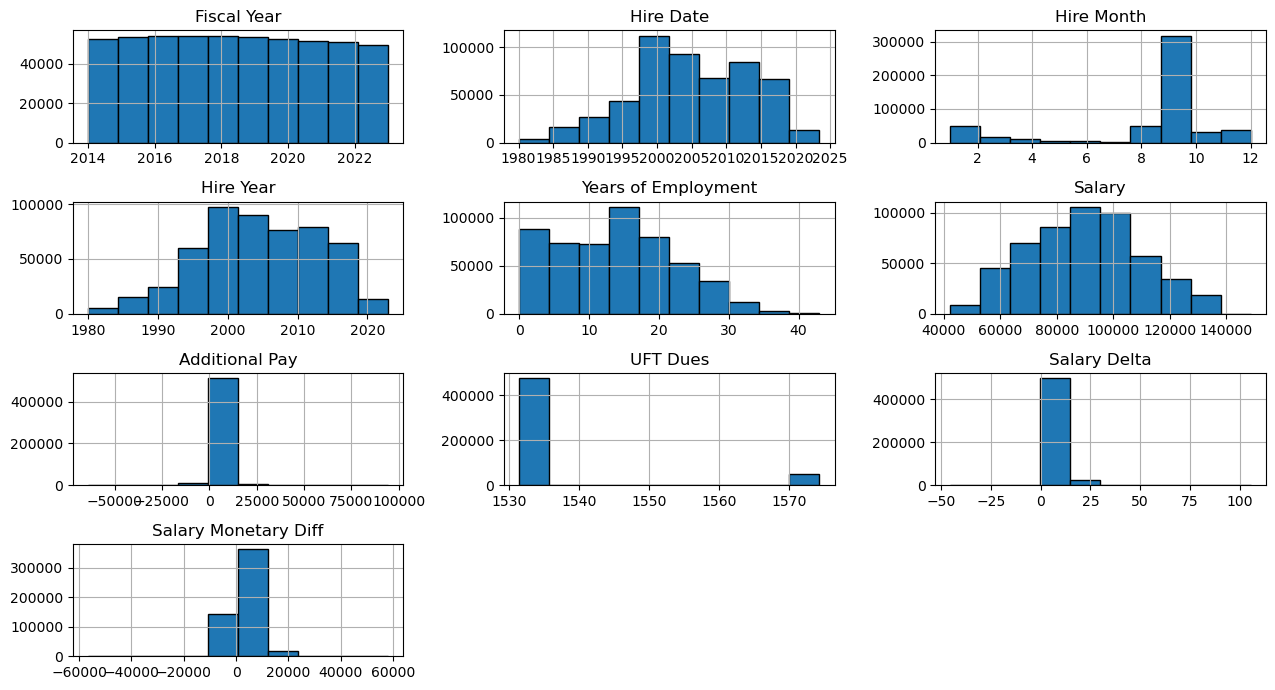

In [45]:
df.hist(figsize=(13,7), ec='black')
plt.tight_layout();

## Exploratory Data Analysis

In [46]:
numeric_cols = df.select_dtypes(include='number').columns.to_list()
category_cols = df.select_dtypes(exclude='number').columns.to_list()

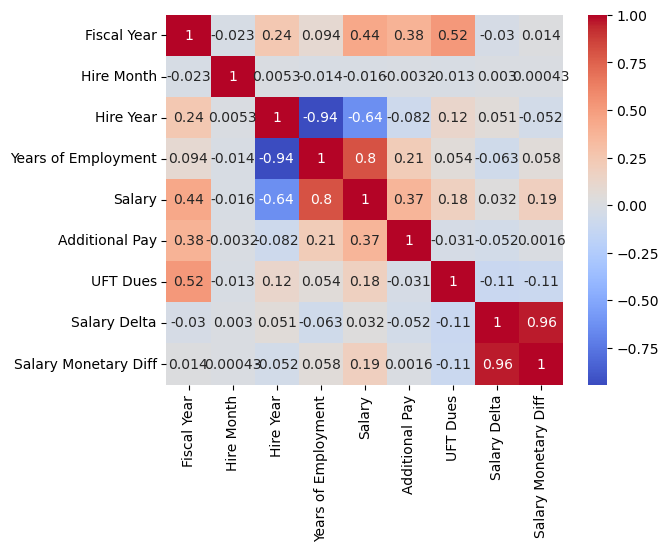

In [47]:
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm');

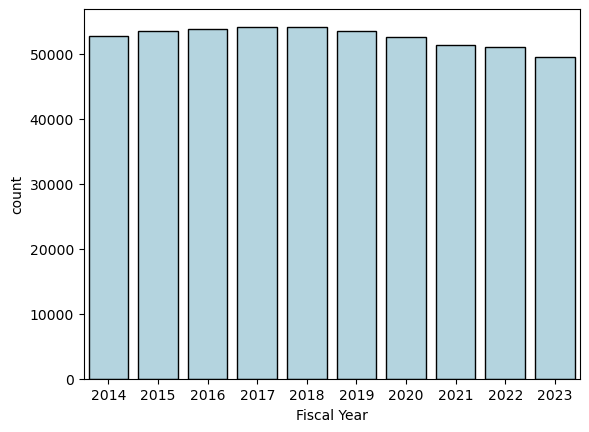

In [48]:
sns.countplot(x=df['Fiscal Year'],color='lightblue',ec='black');

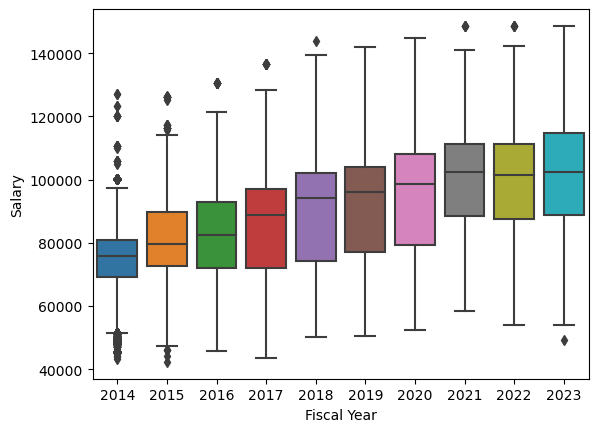

In [49]:
sns.boxplot(data=df, y='Salary', x='Fiscal Year');

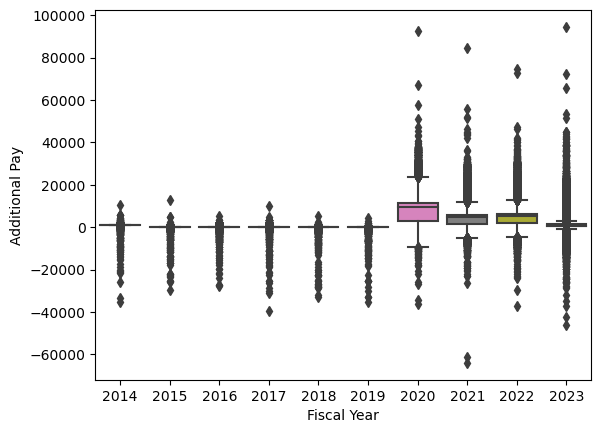

In [50]:
sns.boxplot(data=df, y='Additional Pay', x='Fiscal Year');

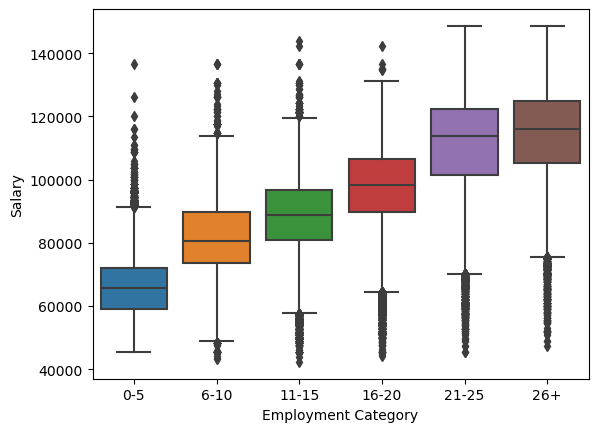

In [51]:
sns.boxplot(data=df, y='Salary', x='Employment Category');

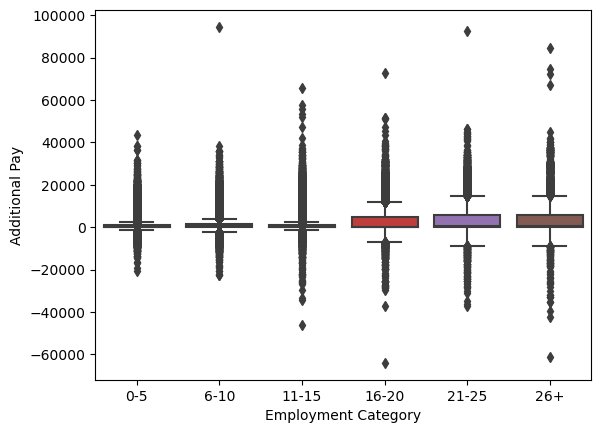

In [52]:
sns.boxplot(data=df, y='Additional Pay', x='Employment Category');

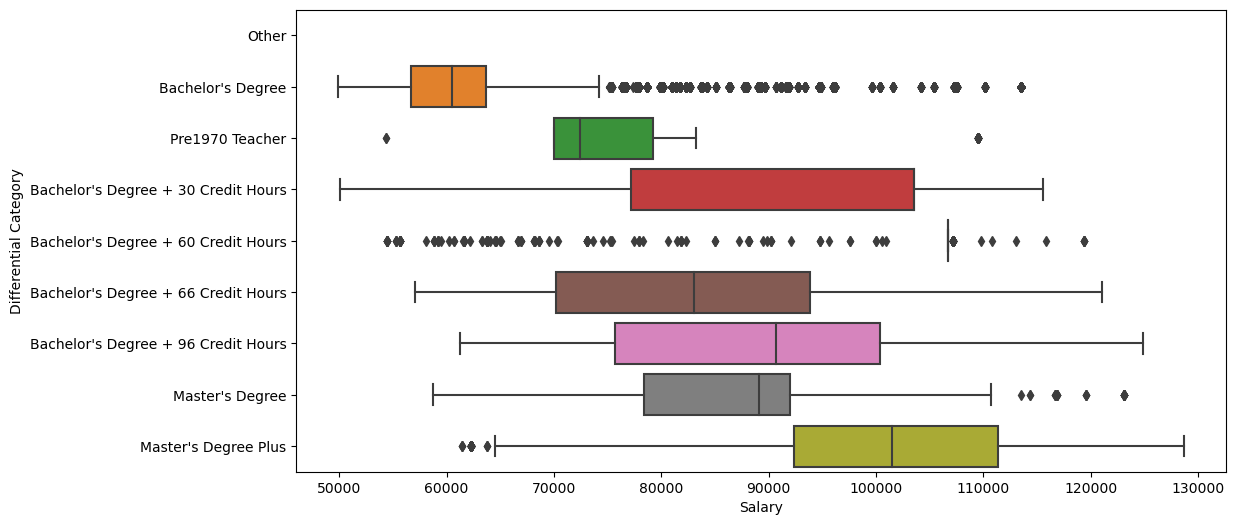

In [53]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Salary', y='Differential Category');

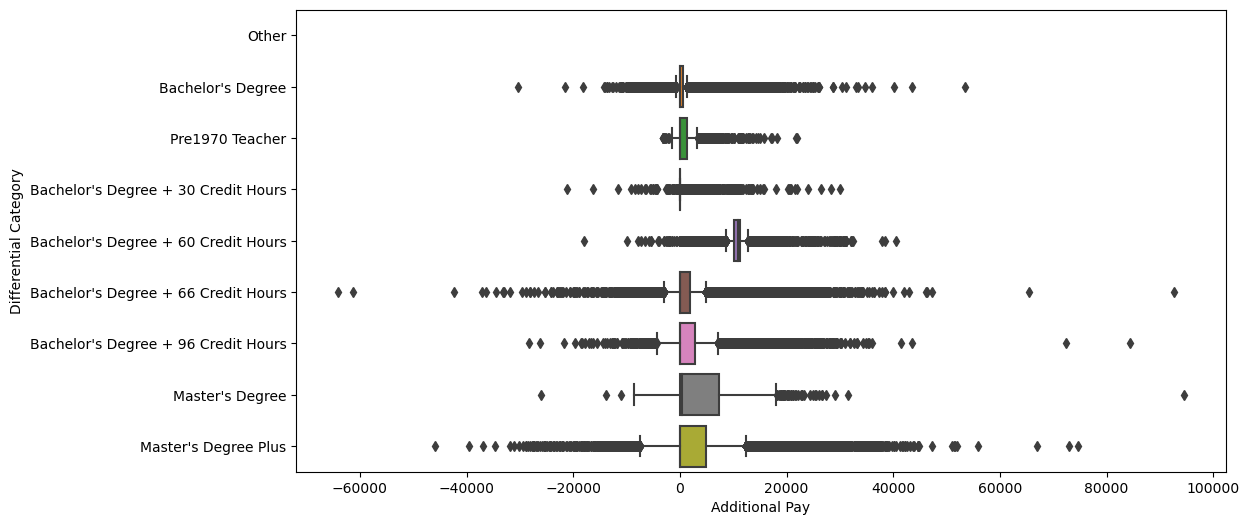

In [54]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Additional Pay', y='Differential Category');

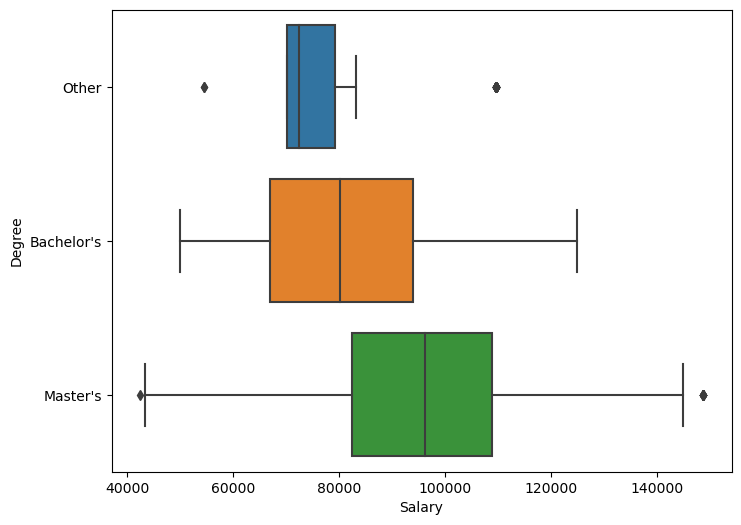

In [55]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Salary', y='Degree');

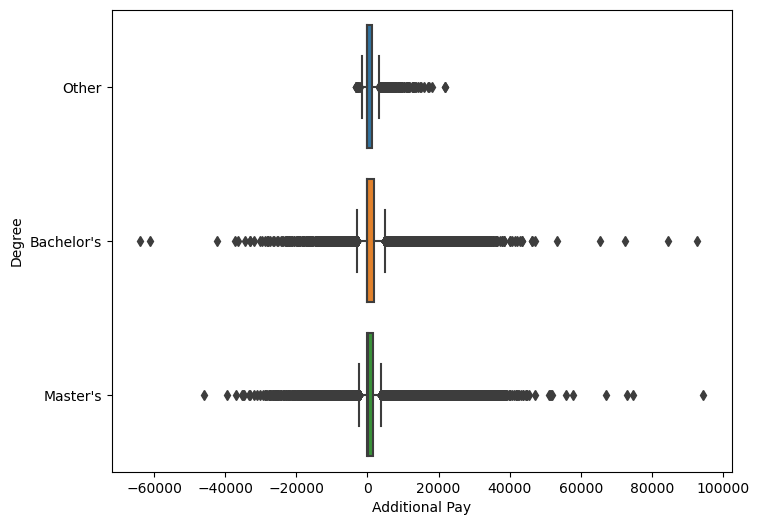

In [56]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Additional Pay', y='Degree');

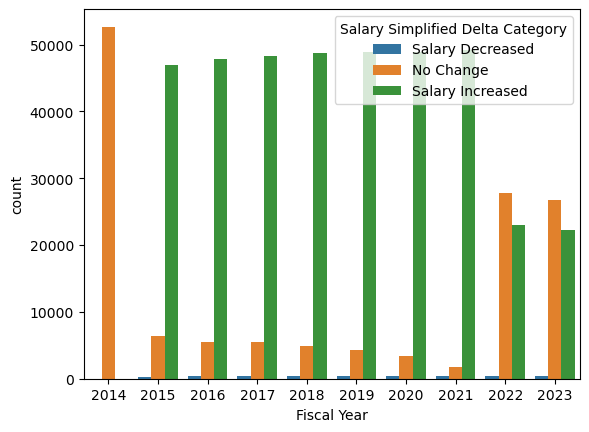

In [57]:
sns.countplot(data=df,
              x='Fiscal Year',
              hue='Salary Simplified Delta Category');

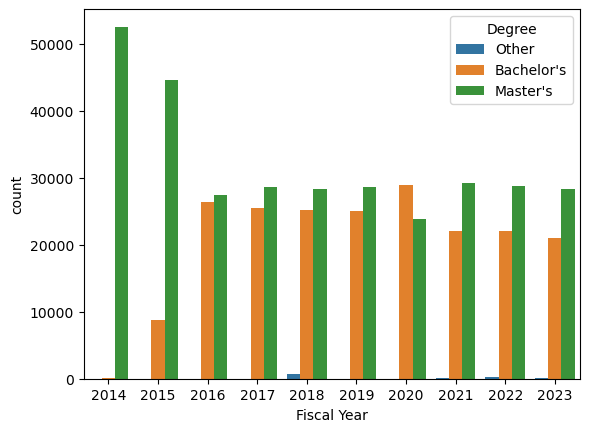

In [58]:
sns.countplot(data=df,
              x='Fiscal Year',
              hue='Degree');

In [59]:
pd.crosstab(df['Differential Category'],df['Fiscal Year'])

Fiscal Year,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Differential Category,,,,,,,,,,
Bachelor's Degree,81,1692,4021,4289,4507,4109,3866,2687,3282,3140
Pre1970 Teacher,5,2,0,0,705,2,13,153,219,164
Bachelor's Degree + 30 Credit Hours,13,51,1554,154,90,90,116,86,102,157
Bachelor's Degree + 60 Credit Hours,16,31,26,13,14,23,4724,9,5,14
Bachelor's Degree + 66 Credit Hours,7,6940,17591,17806,17324,17547,17038,16391,15942,15047
Bachelor's Degree + 96 Credit Hours,4,122,3147,3253,3220,3202,3134,2865,2761,2680
Master's Degree,1,32,51,56,68,75,80,93,105,115
Master's Degree Plus,1,10197,26198,27158,26910,22105,22257,27701,27008,26715


In [60]:
pd.crosstab(df['Differential Category'],df['Salary Schedule'])

Salary Schedule,2013,2014 May,2014 Sept,2015,2016,2017,2018 May,2018 June,2019,2020,2021,2022,2024
Differential Category,,,,,,,,,,,,,
Bachelor's Degree,0,0,1,1666,4021,4302,3,4491,4184,3866,9112,28,0
Pre1970 Teacher,101,0,0,5,0,200,336,0,13,50,556,0,2
Bachelor's Degree + 30 Credit Hours,0,0,4,54,94,98,9,88,1534,68,347,0,117
Bachelor's Degree + 60 Credit Hours,5,24,0,31,14,14,0,26,67,8,28,0,4658
Bachelor's Degree + 66 Credit Hours,312,0,0,6945,17585,17807,5,17319,17560,17039,47054,0,7
Bachelor's Degree + 96 Credit Hours,2,2,0,266,3160,3095,3,3220,3204,3133,8303,0,0
Master's Degree,0,0,0,31,52,56,1,68,75,80,313,0,0
Master's Degree Plus,0,3,0,11585,26195,27158,4,26906,22102,22258,80035,0,4


In [61]:
df['Additional Pay'].quantile(np.linspace(0,1,25,endpoint=True).round(2)).round(2)

0.00   -64035.91
0.04        0.00
0.08        0.00
0.12        0.00
0.17        0.00
0.21        0.00
0.25        0.00
0.29        0.00
0.33        0.00
0.38        0.00
0.42        0.00
0.46        0.00
0.50        7.17
0.54      318.10
0.58      497.22
0.62      996.46
0.67     1000.00
0.71     1000.04
0.75     1791.02
0.79     3221.61
0.83     4870.38
0.88     5871.96
0.92     7617.03
0.96    11202.52
1.00    94466.93
Name: Additional Pay, dtype: float64

In [62]:
pd.crosstab(df['Additional Pay Category'],df['Fiscal Year'])

Fiscal Year,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Additional Pay Category,,,,,,,,,,
<$0,156,330,342,324,331,289,921,1738,1814,4665
$0,853,46067,45661,48208,49430,48458,41,73,89,257
0-$500,387,6491,6939,4721,3795,4802,2539,6274,2147,18380
$500-$1K,46258,525,227,209,605,45,2394,2785,3853,10373
$1k-$3K,5019,59,656,636,23,4,6969,8208,9505,8703
$3K-$10K,12,2,3,14,1,2,16489,30399,29664,5304
$10K+,1,1,0,0,0,0,23319,1901,4003,1875


In [63]:
pd.crosstab(df['Additional Pay Category'],df['Salary Schedule'])

Salary Schedule,2013,2014 May,2014 Sept,2015,2016,2017,2018 May,2018 June,2019,2020,2021,2022,2024
Additional Pay Category,,,,,,,,,,,,,
<$0,0,0,0,216,317,332,16,326,287,875,7778,0,20
$0,346,24,0,16648,43650,47203,11,47578,43569,85,870,16,70
0-$500,73,5,0,2578,6301,4164,67,3611,4419,2517,25861,12,19
$500-$1K,0,0,2,453,224,213,115,582,162,2345,16143,0,20
$1k-$3K,1,0,3,371,627,674,98,20,188,6756,24659,0,59
$3K-$10K,0,0,0,251,2,132,42,1,82,15089,62978,0,729
$10K+,0,0,0,66,0,12,12,0,32,18835,7459,0,3871


In [64]:
df.groupby(['Fiscal Year'])['UFT Dues'].sum()

Fiscal Year
2014    80685447.84
2015    81893754.00
2016    82434352.32
2017    82869281.28
2018    82981076.40
2019    82085184.00
2020    80664007.68
2021    78682324.32
2022    78218298.00
2023    78022540.80
Name: UFT Dues, dtype: float64

In [65]:
df.groupby(['Salary Schedule'])['UFT Dues'].sum()

Salary Schedule
Other        0.000000e+00
2013         6.432048e+05
2014 May     4.441176e+04
2014 Sept    7.657200e+03
2015         3.153911e+07
2016         7.828874e+07
2017         8.075489e+07
2018 May     5.580050e+05
2018 June    7.981559e+07
2019         7.464489e+07
2020         7.121502e+07
2021         2.252390e+08
2022         4.288032e+04
2024         7.332535e+06
Name: UFT Dues, dtype: float64

In [66]:
df_2021_to_2023 = df[df['Fiscal Year']>=2021]

In [67]:
pd.crosstab(df_2021_to_2023['Degree'], df_2021_to_2023['Salary Simplified Delta Category'])

Salary Simplified Delta Category,Salary Decreased,No Change,Salary Increased
Degree,,,
Other,0,210,326
Bachelor's,254,22697,42217
Master's,970,33403,51933


In [68]:
pd.crosstab(df_2021_to_2023['Employment Category'], df_2021_to_2023['Salary Simplified Delta Category'])

Salary Simplified Delta Category,Salary Decreased,No Change,Salary Increased
Employment Category,,,
0-5,11,7393,17845
6-10,197,9234,21618
11-15,230,6570,12125
16-20,415,11661,18814
21-25,257,11298,17643
26+,114,10154,6431


In [69]:
pd.crosstab(df['Salary Schedule'],df['Fiscal Year'])

Fiscal Year,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Salary Schedule,,,,,,,,,,
2013,0,7,1,1,99,312,0,0,0,0
2014 May,0,10,6,0,0,13,0,0,0,0
2014 Sept,4,0,0,0,0,0,1,0,0,0
2015,26,19006,15,143,0,0,4,494,488,407
2016,0,1,51105,15,0,0,0,0,0,0
2017,0,0,0,52498,13,2,0,46,123,48
2018 May,10,0,1,3,11,0,0,111,105,120
2018 June,0,12,0,0,52105,0,1,0,0,0
2019,80,3,1458,0,1,46801,71,130,101,94


In [70]:
# h_test_1 = stats.chi2_contingency(pd.crosstab(df['Employment Category'], df['Salary Category']))
# h_test_2 = stats.chi2_contingency(pd.crosstab(df['Employment Category'], df['Salary Delta Category']))
# h_test_3 = stats.chi2_contingency(pd.crosstab(df['Employment Category'], df['Salary Monetary Diff Category']))
# h_test_4 = stats.chi2_contingency(pd.crosstab(df['Salary Category'], df['Salary Delta Category']))
# h_test_5 = stats.chi2_contingency(pd.crosstab(df['Salary Category'], df['Salary Monetary Diff Category']))
# h_test_6 = stats.chi2_contingency(pd.crosstab(df_2021_to_2023['Degree'], df_2021_to_2023['Salary Simplified Delta Category']))